# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline

In [2]:
def drop_outliers(data, cols):
    data2 = data.copy()
    for col in cols:
        z = np.abs(stats.zscore(data2[col]))
        data2 = data2.drop(index=np.where(z > 3)[0].tolist(), errors='ignore')
    return data2

In [3]:
#Feature before analysis
FEATURE_COLUMNS: list = [
    'uid','count__trend', 'count__uncertainty',
    'transaction_amount_cv__trend', 'transaction_amount_cv__uncertainty',
    'normalized_amount__trend', 'normalized_amount__uncertainty',
    'cv_transaction_time__trend', 'cv_transaction_time__uncertainty',
    'overall_transaction_amount__mean', 'overall_transaction_amount__cv',
    'overall__concentration', 'overall_transaction_time__cv',
    'overall_transaction_time', 'monthly_amount__mean',
    'monthly_transactions__mean'
]

#feature after analysis
NEW_FEATURE_COLUMNS: list = [
    'count__trend', 'count__uncertainty',
    'transaction_amount_cv__trend', 'transaction_amount_cv__uncertainty',
    'normalized_amount__trend', 'normalized_amount__uncertainty',
    'cv_transaction_time__trend', 'cv_transaction_time__uncertainty',
    'overall_transaction_amount__mean', 'overall_transaction_amount__cv',
    'overall__concentration', 'overall_transaction_time__cv',
    'overall_transaction_time', 'monthly_amount__mean'
]


# Dataset

In [4]:
dataset = pd.read_csv(
    "dataset.csv",
    usecols=NEW_FEATURE_COLUMNS + ['uid'],
    index_col='uid'
).dropna()

dataset.head(2)

,count__trend,count__uncertainty,transaction_amount_cv__trend,transaction_amount_cv__uncertainty,normalized_amount__trend,normalized_amount__uncertainty,cv_transaction_time__trend,cv_transaction_time__uncertainty,overall_transaction_amount__mean,overall_transaction_amount__cv,overall__concentration,overall_transaction_time__cv,overall_transaction_time,monthly_amount__mean
uid,,,,,,,,,,,,,,
168,0.024330,0.029575,0.001581,0.002427,1.390974e-06,6.944174e-07,0.005489,0.006074,2.677965,0.014782,0.018519,0.102834,5.267685,3.549062
172,0.024792,0.003307,0.001217,0.001302,5.955682e-08,1.066821e-08,-0.000917,0.001637,2.676223,0.114209,0.001387,0.217396,4.132320,4.352983


# Data set dimension

In [5]:
print(dataset.shape)

(35202, 14)


# Dataset removing outliers:

In [6]:
#droping std outlier rows
dataset_out = drop_outliers(dataset, dataset.columns)
print(dataset_out.shape)
dataset_out.head(2)

(34913, 14)


,count__trend,count__uncertainty,transaction_amount_cv__trend,transaction_amount_cv__uncertainty,normalized_amount__trend,normalized_amount__uncertainty,cv_transaction_time__trend,cv_transaction_time__uncertainty,overall_transaction_amount__mean,overall_transaction_amount__cv,overall__concentration,overall_transaction_time__cv,overall_transaction_time,monthly_amount__mean
uid,,,,,,,,,,,,,,
168,0.024330,0.029575,0.001581,0.002427,1.390974e-06,6.944174e-07,0.005489,0.006074,2.677965,0.014782,0.018519,0.102834,5.267685,3.549062
172,0.024792,0.003307,0.001217,0.001302,5.955682e-08,1.066821e-08,-0.000917,0.001637,2.676223,0.114209,0.001387,0.217396,4.132320,4.352983


# Selecting clusters

# PCA for original Dataset

In [7]:
pca = PCA()
pca_scores = pca.fit_transform(scale(dataset))

In [8]:
pca_scores = pd.DataFrame(pca_scores, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])

In [9]:
pca_scores.shape

(35202, 14)

Text(0, 0.5, 'd[Inertia]')

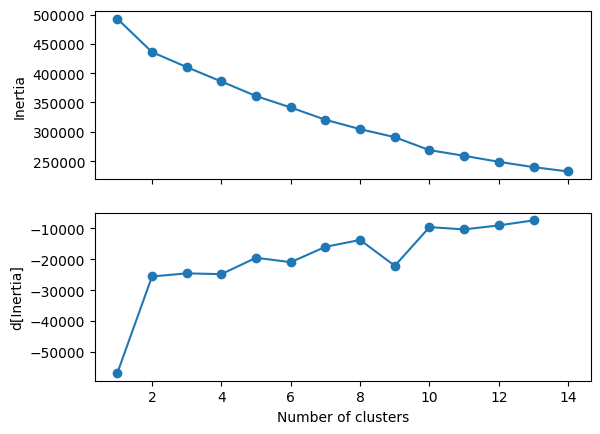

In [10]:
clusters = range(1, 15, 1)
inertias = []

for n in clusters:
    k = KMeans(n_clusters=n, random_state=12345, n_init=10)
    k.fit(pca_scores)
    inertias.append(k.inertia_)
    
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(clusters, inertias, '-o')
ax2.plot(clusters[:-1], np.diff(inertias), '-o')

ax2.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax2.set_ylabel('d[Inertia]')

# Loadings

In [11]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'], index = dataset.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
count__trend,-0.108918,0.233288,-0.568684,-0.311860,-0.025343,0.062100,0.048832,-0.025877,0.035607,0.256287,-0.166978,0.640686,0.006490,-0.012262
count__uncertainty,0.018396,0.035942,0.126049,-0.144334,0.446811,0.555632,-0.042704,-0.180580,-0.642950,0.051170,-0.052020,-0.007053,0.005077,-0.008122
transaction_amount_cv__trend,-0.119417,-0.087533,-0.315178,0.471684,0.325459,-0.038343,0.019365,0.196263,-0.064924,-0.615012,-0.317219,0.152224,-0.059877,0.011248
transaction_amount_cv__uncertainty,0.048819,0.018293,0.099481,-0.059459,0.427096,-0.429265,0.655541,0.310874,-0.152982,0.255097,0.045759,0.000252,0.014354,-0.004060
normalized_amount__trend,0.033331,0.229456,-0.544567,-0.393585,0.062332,0.038593,0.066786,0.096725,0.004776,-0.273359,0.252181,-0.580662,0.005991,-0.006212
normalized_amount__uncertainty,0.059348,0.087296,0.157888,-0.037958,0.386676,0.509441,0.115366,0.172477,0.708652,0.049884,-0.065500,-0.012775,0.035215,-0.003597
cv_transaction_time__trend,-0.056016,-0.066168,-0.172983,0.120365,0.489299,-0.323393,-0.181757,-0.692523,0.211928,0.176441,0.052499,-0.112476,-0.001164,-0.000674
cv_transaction_time__uncertainty,0.051205,0.015141,0.050621,-0.174532,0.309122,-0.258888,-0.712850,0.508780,-0.034876,0.174756,-0.050598,-0.005910,0.013501,0.000510
overall_transaction_amount__mean,0.086872,-0.668956,-0.050391,-0.375731,0.018322,-0.008426,0.049883,-0.030849,0.045885,-0.133188,-0.126402,0.051000,0.340284,0.493128
overall_transaction_amount__cv,0.154326,0.452405,0.254022,-0.254499,-0.052768,-0.204118,0.025490,-0.186066,0.016711,-0.189661,-0.687621,-0.133472,0.176986,0.065465


# PCA Scores distribution 

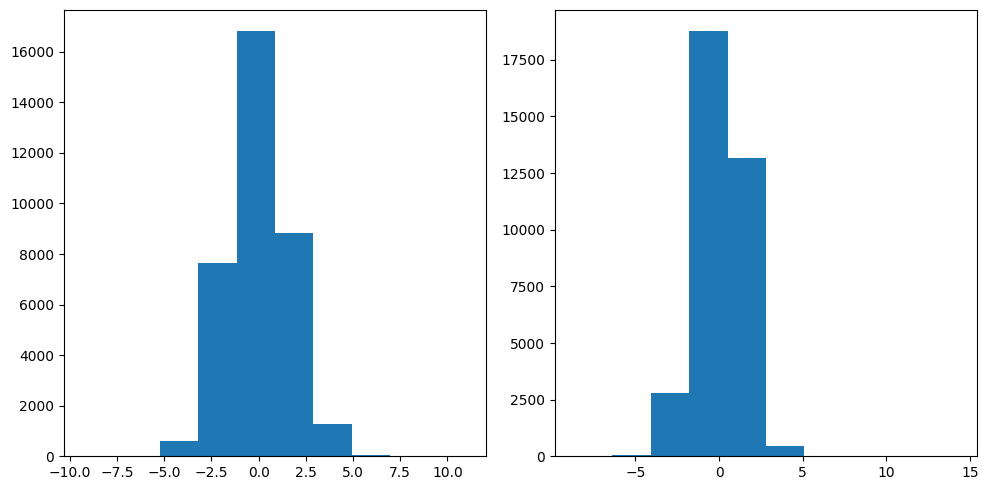

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(pca_scores['PC1'])
ax[1].hist(pca_scores['PC2'])
fig.tight_layout()

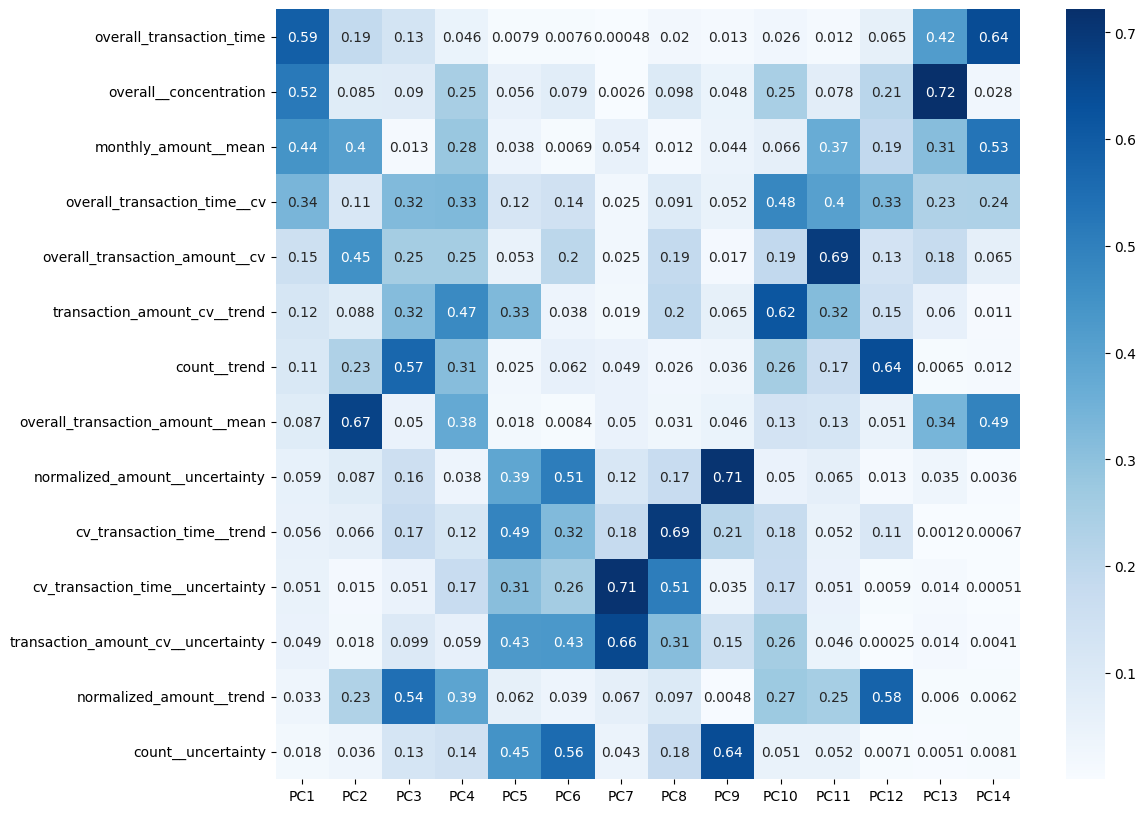

In [13]:
sorted_loadings = loadings.abs().sort_values(['PC1', 'PC2'], ascending=False)
plt.figure(figsize=(12,10))
sns.heatmap(
    sorted_loadings,
    annot=True, 
    cmap=plt.cm.Blues
)
plt.show()

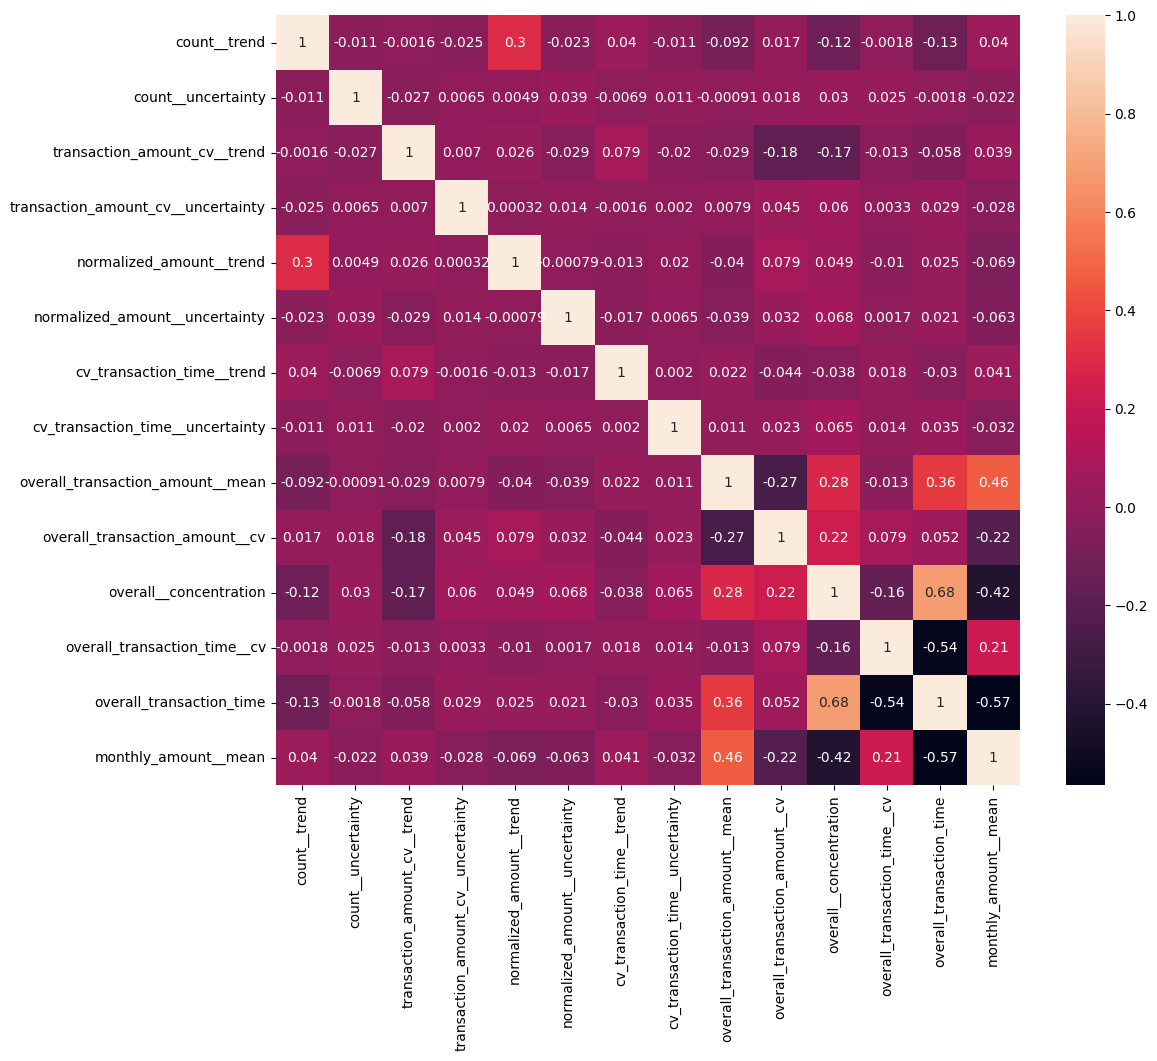

In [14]:
plt.figure(figsize=(12,10))
cor = dataset_out.corr()
sns.heatmap(cor,annot=True)
plt.show()

# Features importance for PC

In [15]:
pc1_weights = sorted_loadings['PC1'] / sorted_loadings['PC1'].sum()
pc2_weights = sorted_loadings['PC2'] / sorted_loadings['PC2'].sum()


<Axes: >

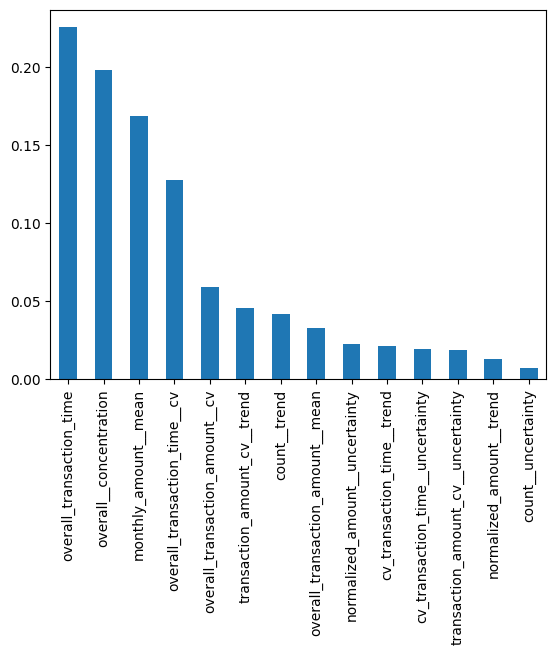

In [16]:
pc1_weights.plot.bar()

<Axes: >

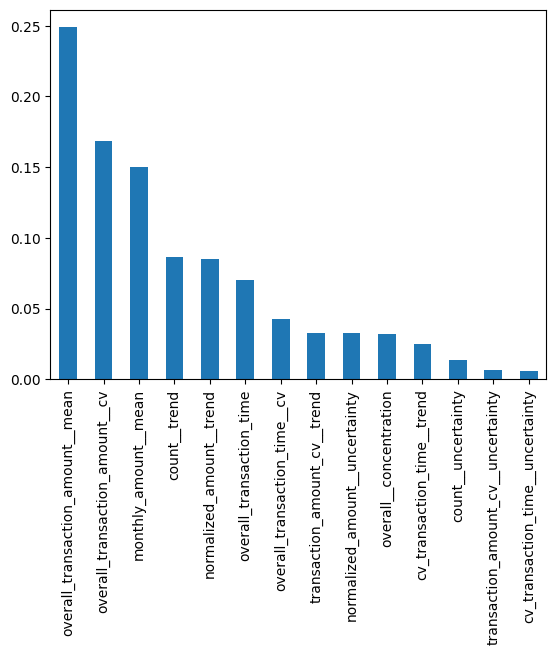

In [17]:
pc2_weights.sort_values(ascending=False).plot.bar()

In [18]:
dataset_out.head(2)

,count__trend,count__uncertainty,transaction_amount_cv__trend,transaction_amount_cv__uncertainty,normalized_amount__trend,normalized_amount__uncertainty,cv_transaction_time__trend,cv_transaction_time__uncertainty,overall_transaction_amount__mean,overall_transaction_amount__cv,overall__concentration,overall_transaction_time__cv,overall_transaction_time,monthly_amount__mean
uid,,,,,,,,,,,,,,
168,0.024330,0.029575,0.001581,0.002427,1.390974e-06,6.944174e-07,0.005489,0.006074,2.677965,0.014782,0.018519,0.102834,5.267685,3.549062
172,0.024792,0.003307,0.001217,0.001302,5.955682e-08,1.066821e-08,-0.000917,0.001637,2.676223,0.114209,0.001387,0.217396,4.132320,4.352983


In [19]:
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('clf', KMeans(n_clusters=4, random_state=12345, n_init=10))
    ]
)

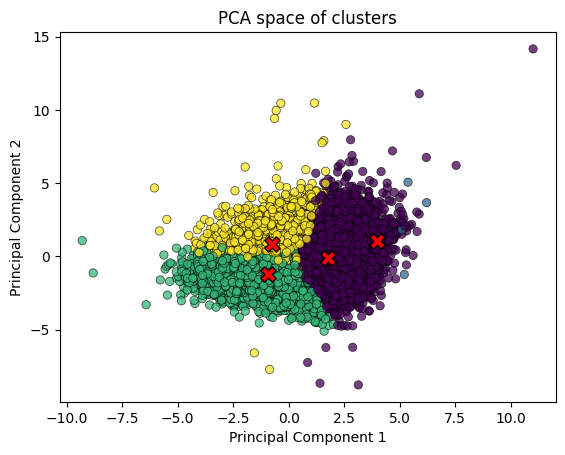

In [20]:
pipeline.fit(
    dataset_out
)

X = pipeline['scaler'].transform(dataset_out)

pca = PCA().fit(X)

X_ = pca.transform(X)

y = pipeline['clf'].predict(X)

dataset_out2 = dataset_out.assign(
    cluster=y
)

fig, ax = plt.subplots()

ax.scatter(X_[:, 0], X_[:, 1], c=y, edgecolor='k', lw=0.5, alpha=0.75)

centroids = pca.transform(
    pipeline['clf'].cluster_centers_
)

ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=120,
    edgecolor='k',
    color='r',
    marker='X'
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA space of clusters')

plot1 = plt.show()

In [21]:
pd.Series(y).value_counts()

3    14299
0    11144
2     9460
1       10
Name: count, dtype: int64